<a href="https://colab.research.google.com/github/Sujabaral/Ai_Lab_5/blob/main/Ai_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI LABSHEET 5: K-Means Clustering

**Name:** Suja Baral  
**CRN:** 021-387  
**Date:** 04/07/2025


# k-Means Clustering for 2 Features with k=2 Clusters

Final Centroids:
[[1.48333333 1.71666667]
 [5.25       5.55      ]]

Cluster Assignments:
[0 0 0 0 1 1 1 1 0 0 1 1]

Within-Cluster Sum of Squares (WCSS): 1.4466666666666668


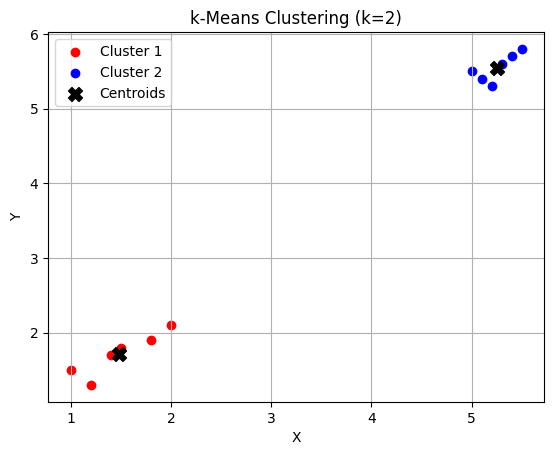

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Dataset with two features (x, y)
data = np.array([
    [1.0, 1.5],
    [1.5, 1.8],
    [1.2, 1.3],
    [1.4, 1.7],
    [5.0, 5.5],
    [5.5, 5.8],
    [5.2, 5.3],
    [5.4, 5.7],
    [2.0, 2.1],
    [1.8, 1.9],
    [5.1, 5.4],
    [5.3, 5.6]
])

# Number of clusters
k = 2

# Maximum number of iterations
max_iterations = 100

# Randomly initialize centroids
random_indices = random.sample(range(len(data)), k)
centroids = data[random_indices]

# Run k-means algorithm
for _ in range(max_iterations):
    # Assign clusters
    labels = []
    for point in data:
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        labels.append(np.argmin(distances))
    labels = np.array(labels)

    # Update centroids
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

    # Check for convergence
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Calculate Within-Cluster Sum of Squares (WCSS)
wcss = sum(np.sum((data[i] - centroids[labels[i]]) ** 2) for i in range(len(data)))

# Print results
print("Final Centroids:")
print(centroids)
print("\nCluster Assignments:")
print(labels)
print("\nWithin-Cluster Sum of Squares (WCSS):", wcss)

# Visualize the clusters
colors = ['red', 'blue']
for i in range(k):
    cluster_points = data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroids')
plt.title('k-Means Clustering (k=2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


#k-Means Clustering for Arbitrary Features with k Clusters


Final Centroids:
[[1.45       1.78333333 1.15833333 1.475     ]
 [4.45       4.85       3.975      4.375     ]
 [4.15       4.55       3.8125     4.1875    ]]

Cluster Assignments:
[0 0 0 0 2 2 2 2 0 0 1 1]

WCSS: 4.480416666666665


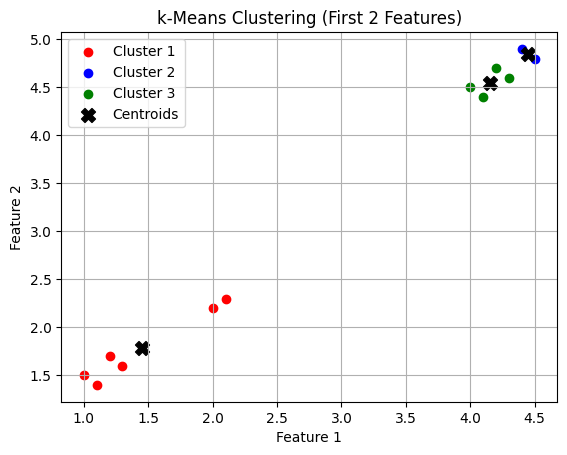

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Load dataset with 4 features
data = np.array([
    [1.0, 1.5, 0.8, 1.2],
    [1.2, 1.7, 0.9, 1.1],
    [1.1, 1.4, 0.7, 1.3],
    [1.3, 1.6, 0.85, 1.15],
    [4.0, 4.5, 3.8, 4.2],
    [4.2, 4.7, 3.9, 4.1],
    [4.1, 4.4, 3.7, 4.3],
    [4.3, 4.6, 3.85, 4.15],
    [2.0, 2.2, 1.8, 2.1],
    [2.1, 2.3, 1.9, 2.0],
    [4.5, 4.8, 4.0, 4.4],
    [4.4, 4.9, 3.95, 4.35]
])

k = 3
max_iterations = 100

# Initialize centroids randomly
indices = random.sample(range(len(data)), k)
centroids = data[indices]

# k-Means algorithm
for _ in range(max_iterations):
    # Assign points to nearest centroid
    labels = []
    for point in data:
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        labels.append(np.argmin(distances))
    labels = np.array(labels)

    # Update centroids
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

    # Stop if centroids do not change
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Compute WCSS (Within-Cluster Sum of Squares)
wcss = 0
for i in range(len(data)):
    wcss += np.sum((data[i] - centroids[labels[i]]) ** 2)

# Print results
print("Final Centroids:")
print(centroids)

print("\nCluster Assignments:")
print(labels)

print("\nWCSS:", wcss)

# Visualization using first two features
colors = ['red', 'blue', 'green']
for i in range(k):
    cluster_points = data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=100, label='Centroids')
plt.title("k-Means Clustering (First 2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
